**Redes neuronales CNN**
Predict

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import numpy as np
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
height, width=100,100 #tamaño en el que se procesan las imagenes
model='/content/drive/My Drive/Animales/model/model_acc60.h5'
weights='/content/drive/My Drive/Animales/model/weights_acc60.h5'
animals = ['Gato','Perico','Perro']

In [0]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        cnn1 = load_model(model)

In [0]:
cnn1.load_weights(weights)

In [0]:
def predict(file):
  x = image.load_img(file, target_size=(height, width))
  x = image.img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn1.predict(x)
  result = array[0]
  return np.argmax(result)

In [0]:
img_extension = '.jpeg'

#img_names= '/content/drive/My Drive/Animales/images'
img_names = ['perro22','gato6','gato18','perico12','perro14','gato18','perro24','gato12','perro14','perico4']
real_class = [2,0,0,1,2,0,2,0,2,1]

In [100]:
pred_class = []

for x in range(0,len(img_names)):
  #prediccion = predict(imgs[x]+img_extension)
  prediccion = predict('/content/drive/My Drive/Animales/images/' + img_names[x] + img_extension)
  pred_class.append(prediccion)
  print("Prediccion: "+animals[pred_class[x]])
  print("Real:       "+animals[real_class[x]])
  print("__________________________________")

Prediccion: Perro
Real:       Perro
__________________________________
Prediccion: Gato
Real:       Gato
__________________________________
Prediccion: Perro
Real:       Gato
__________________________________
Prediccion: Perico
Real:       Perico
__________________________________
Prediccion: Perro
Real:       Perro
__________________________________
Prediccion: Perro
Real:       Gato
__________________________________
Prediccion: Perro
Real:       Perro
__________________________________
Prediccion: Gato
Real:       Gato
__________________________________
Prediccion: Perro
Real:       Perro
__________________________________
Prediccion: Perico
Real:       Perico
__________________________________


**Matriz de confusion**

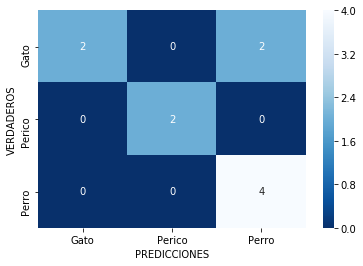

[2, 0, 0, 1, 2, 0, 2, 0, 2, 1]
[2, 0, 2, 1, 2, 2, 2, 0, 2, 1]


In [101]:
confm = confusion_matrix(np.array(real_class),np.array(pred_class))
columnas = [(i) for i in animals]
df_cm=pd.DataFrame(confm,index=columnas,columns=columnas)
grafica = sns.heatmap(df_cm,cmap='Blues_r',annot=True)
plt.ylabel('Valores verdaderos')
plt.xlabel('Predicciones')
grafica.set(xlabel ='PREDICCIONES', ylabel='VERDADEROS')
plt.show()


print(real_class)
print(pred_class)